## Project goal:
    
    The goal is to see the kinds in features of people on loan, that includes their marital status to eduction levels.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mat

In [2]:
bank = pd.read_csv('bank.csv')

In [ ]:
bank.info()

Numerical variables:
         
    age; balance; day; duration; campaign; pdays; previous; 
        
Categorical variables: 
    
    marital; education; default; housing; loan; contact; poutcome; deposit

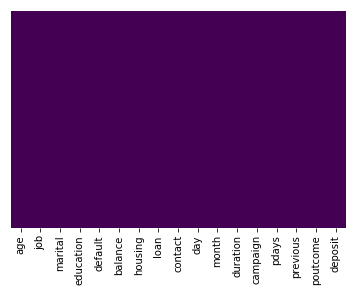

In [4]:
sns.heatmap(bank.isnull(), yticklabels=False, cbar = False, cmap = 'viridis')

In [5]:
#Categorical variables
catego = bank[['marital','education','default','housing','loan','contact','deposit']]

In [6]:
#Numerical variables
data = bank[['age','balance','day','duration','campaign','pdays','previous']]

#### Let's check the profession and gender count.

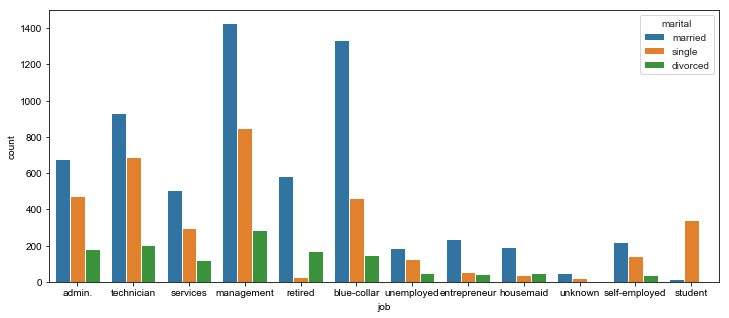

In [7]:
f, ax = mat.subplots(figsize = (12,5))
sns.set_style('whitegrid')
sns.countplot(x='job',hue = 'marital',ax = ax,data=bank)

Management and Blue-collar are well represented

## Lineplot

#### Let's check for a dominant numerical variable

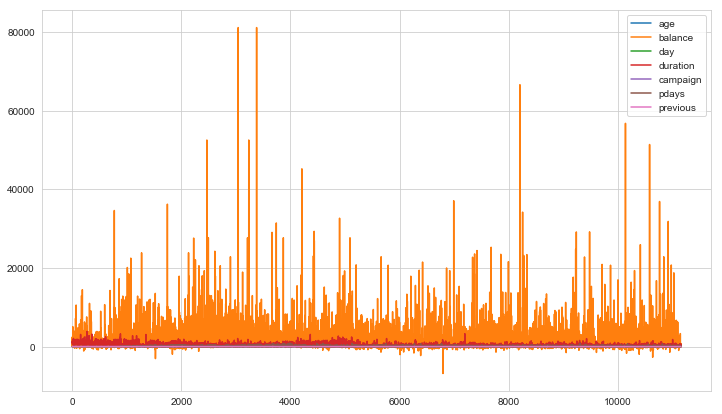

In [8]:
f, ax = mat.subplots(figsize = (12,7))
bank.plot(kind = 'line', ax = ax)

Balance is the most dominating feature

#### Lets check where people of respective professions take loans in respect to their age 

C:\Users\Mosima\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


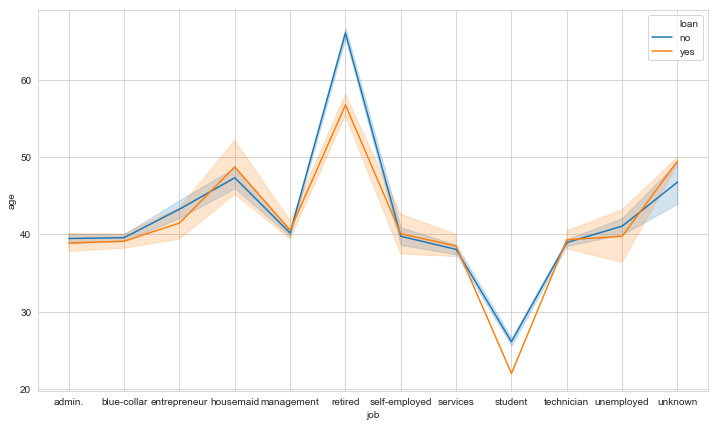

In [9]:
f, ax = mat.subplots(figsize=(12,7))
sns.set_style('whitegrid')
sns.lineplot(x='job', y='age',hue = 'loan',ax=ax,data=bank)

Looking at the plot you will realize that across all the professional groups(but except students and technicians), the age group of between 40-60 have loans, mostly with loans being the age group of between 40-50 which is the working class. Only people to have a loan and on ages of between 50-60 are retired. Students and Technicians recorded very low to have loans and only taking loans between the age group of 23-40. Lastly, the retired people over the age 60 do not have loans.

#### Lets check at which month a certain age group is likely to take a loan.

C:\Users\Mosima\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


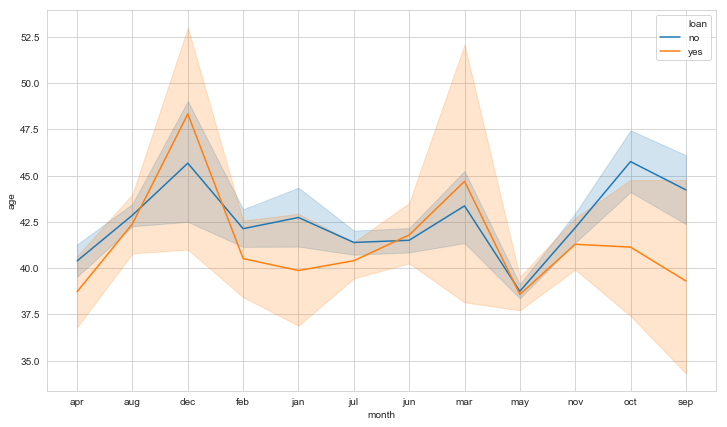

In [10]:
f, ax = mat.subplots(figsize=(12,7))
sns.set_style('whitegrid')
sns.lineplot(x='month', y='age',hue = 'loan',ax=ax,data=bank)

Looking at plot, the bar Dec, and the bar Mar shows that the age group of 42-48 are most likely to take loans.

#### Lets check at overall the month that has most loans. 

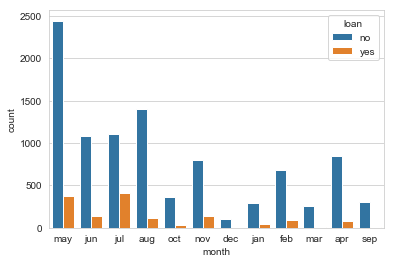

In [42]:
sns.set_style('whitegrid')
sns.countplot(x='month',hue = 'loan',data=bank)

May and July have the most loans.

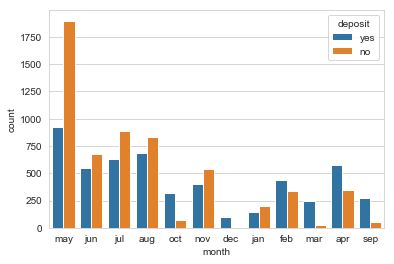

In [43]:
sns.set_style('whitegrid')
sns.countplot(x='month',hue = 'deposit',data=bank)

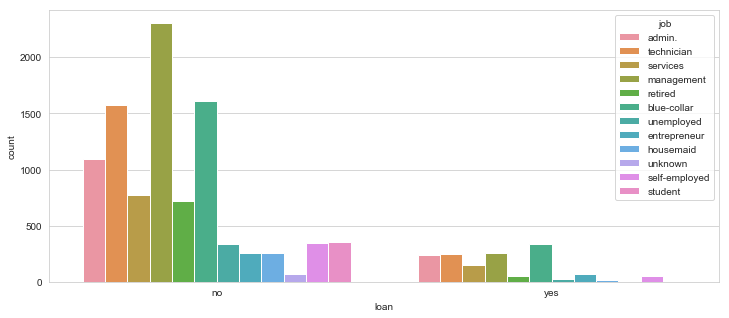

In [95]:
f, ax = mat.subplots(figsize=(12, 5))
sns.set_style('whitegrid')
sns.countplot(x='loan',hue = 'job',data=bank)

#### Let's check which profession have housing in relation to their balances.

C:\Users\Mosima\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


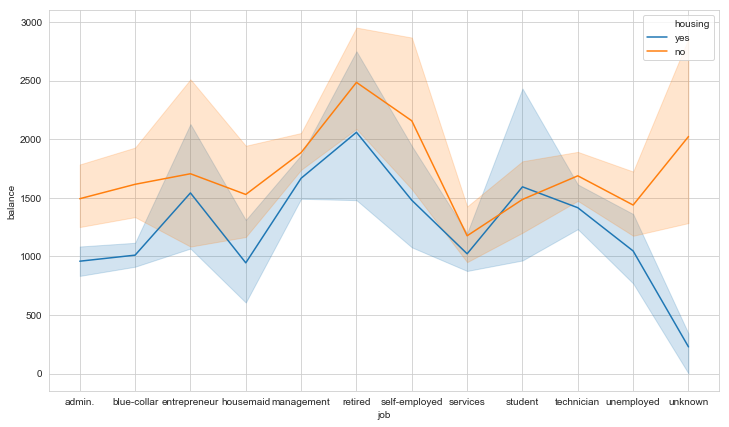

In [12]:
f, ax = mat.subplots(figsize = (12,7))
sns.lineplot(x='job',y='balance',hue='housing', ax = ax,data=bank)

Most of student with balances of between 1400-1600 have housing. With unknown recording most high without housing

#### Let's the Education and Marital status of loan takers

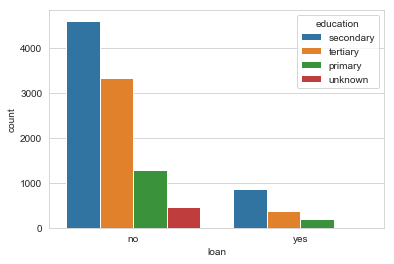

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='loan',hue = 'education',data=bank)

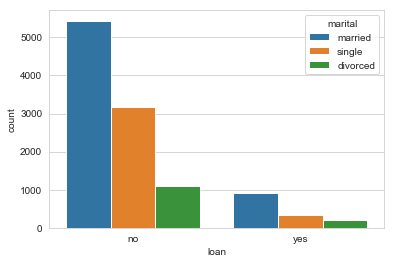

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='loan',hue = 'marital',data=bank)

People with Secondary Education, and Married take loans at most.

#### Distribution plots for banker's Age, and Balance

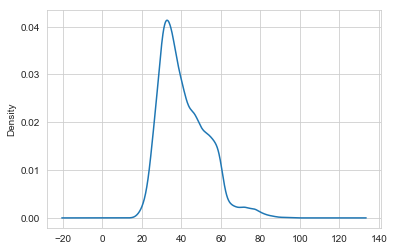

In [33]:
bank['age'].plot.density()

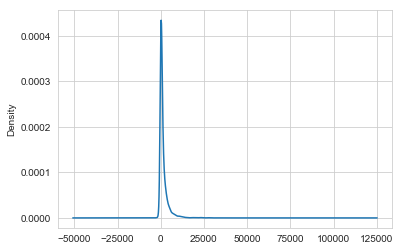

In [35]:
bank['balance'].plot.density()

In [40]:
bank.nlargest(1,'age')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1582,95,retired,divorced,primary,no,2282,no,no,telephone,21,apr,207,17,-1,0,unknown,yes


In [44]:
bank.nlargest(1,'balance')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3043,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes


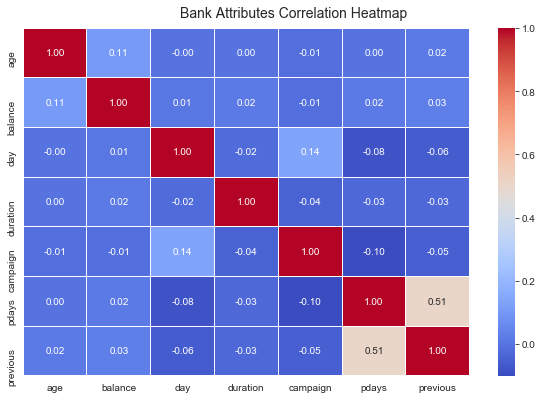

In [15]:
f, ax = mat.subplots(figsize=(10, 6))
corr = bank.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Bank Attributes Correlation Heatmap', fontsize=14)

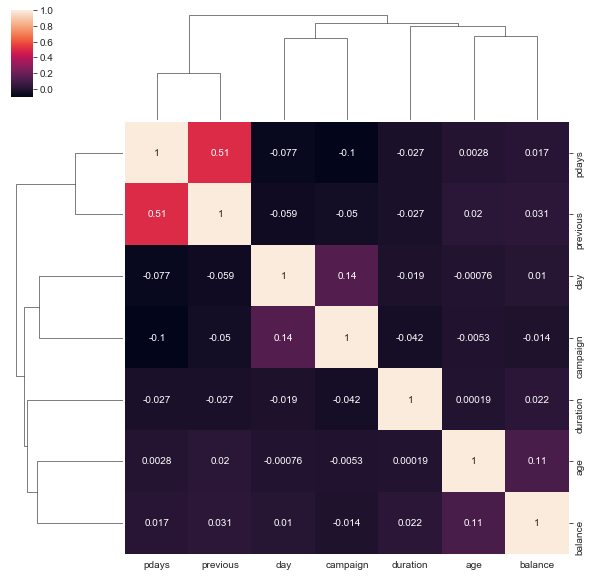

In [16]:
sns.clustermap(bank.corr(), annot=True)


In [18]:
mod = catego.stack().str.get_dummies().sum(level=0)

In [20]:
model = pd.concat([mod,data],axis=1)

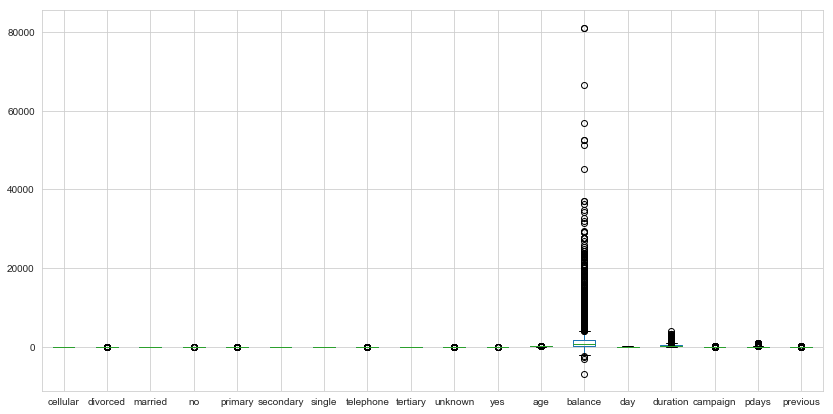

In [21]:
f, ax = mat.subplots(figsize = (14,7))
model.plot(kind='box',ax=ax)

# K-Means Clustering

In [48]:
import pylab as pl
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans

In [49]:
kvalues = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in kvalues]

In [57]:
score = [kmeans[i].fit(model).score(model) for i in range(len(kmeans))]

Checking for the most suitable number of clusters

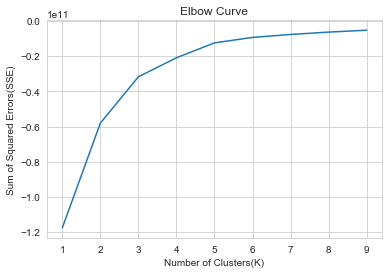

In [58]:
pl.plot(kvalues,score)
pl.xlabel('Number of Clusters(K)')
pl.ylabel('Sum of Squared Errors(SSE)')
pl.title('Elbow Curve')
pl.show()

In [85]:
kmeans2=KMeans(n_clusters=3)
clusters=kmeans2.fit_predict(model)
bank["Cluster"]=clusters


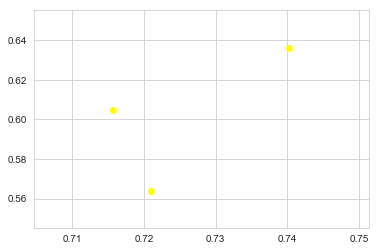

In [80]:

mat.scatter(model.loc[model.Cluster==2],model.loc[model.Cluster==2],color="blue")
mat.scatter(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,2],color="yellow")
mat.show()

## Cluster Insights

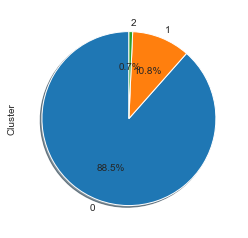

In [86]:
bank['Cluster'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, startangle=90)
mat.gca().set_aspect('equal')

Looking at the pie chart which is the depiction of clusters percentages, it is very evident that cluster 0 is superiorly dominating with cluster 2 at second and cluster 1 the least.


#### Clusters Stats:

1. Cluster 0: Tot: 9876 Avg_bal: 787   Avg_age: 41 Max_bal: 3540  Max_age: 95
2. Cluster 1: Tot: 1209 Avg_bal: 6345  Avg_age: 44 Max_bal: 16786 Max_age: 87
3. Cluster 2: Tot: 77   Avg_bal: 27412 Avg_age: 47 Max_bal: 81204 Max_age: 84

#### cluster_1 insight

In [104]:
cluster_1 = bank.loc[bank['Cluster']==0]

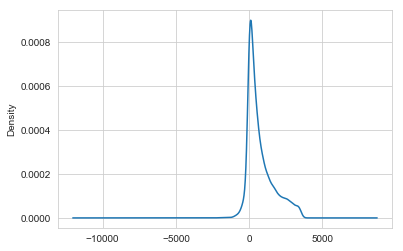

In [105]:
cluster_1['balance'].plot.density()

#### cluster_2 insight

In [106]:
cluster_2 = bank.loc[bank['Cluster']==1]

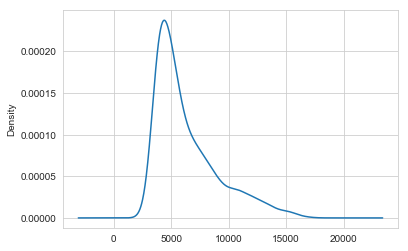

In [107]:
cluster_2['balance'].plot.density()

#### cluster_3 insight

In [108]:
cluster_3 = bank.loc[bank['Cluster']==2]

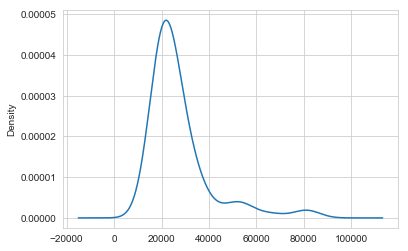

In [109]:
cluster_3['balance'].plot.density()

# Logistic Regression Model

In [210]:
vat = bank[['marital','education','loan','contact']]

In [211]:
modes = vat.stack().str.get_dummies().sum(level=0)

In [212]:
mode = pd.concat([modes,data],axis=1)

In [213]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, r2_score

In [214]:
X_train, X_test, y_train, y_test = train_test_split(mode.drop(['yes'],axis=1), 
                                                    mode['yes'], test_size=0.30)

In [215]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [216]:
predictions = logmodel.predict(X_test)

In [217]:
logmodel.coef_

array([[ 2.98945871e-01,  9.35076856e-02,  2.68440365e-01,
        -8.18764442e+00,  1.11034956e-01,  4.92987162e-01,
         1.72781133e-01, -1.09423382e-01,  1.69266462e-01,
         1.06647298e-01,  2.83231601e-02, -4.53558307e-05,
         2.40823108e-02,  2.66634287e-04,  4.59275806e-02,
        -2.63969986e-04,  2.11431796e-02]])

### Model Evaluation

In [218]:
accuracy_score(y_test, predictions)

1.0

In [219]:
r2_score(y_test, predictions)

1.0

In [220]:
log_loss(y_test,predictions)

9.992007221626413e-16

In [221]:
print(confusion_matrix(y_test,predictions))

[[2908    0]
 [   0  441]]


In [222]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00      2908
          1       1.00      1.00      1.00       441

avg / total       1.00      1.00      1.00      3349

